# <p style="text-align: center;">Clusterização e algoritmo K-means</p> 

Organizar dados em agrupamentos é um dos modos mais fundamentais de compreensão e aprendizado. Como por exemplo, os organismos em um sistema biologico são classificados em domínio, reino, filo, classe, etc. A análise de agrupamento é o estudo formal de métodos e algoritmos para agrupar objetos de acordo com medidas ou características semelhantes. A análise de cluster, em sua essência, não utiliza rótulos de categoria que marcam objetos com identificadores anteriores, ou seja, rótulos de classe. A ausência de informação de categoria distingue o agrupamento de dados (aprendizagem não supervisionada) da classificação ou análise discriminante (aprendizagem supervisionada). O objetivo da clusterização é encontrar estruturas em dados e, portanto, é de natureza exploratória. 

A técnica de Clustering tem uma longa e rica história em uma variedade de campos científicos. Um dos algoritmos de clusterização mais populares e simples, o K-means, foi publicado pela primeira vez em 1955. Apesar do K-means ter sido proposto há mais de 50 anos e milhares de algoritmos de clustering terem sido publicados desde então, o K-means é ainda amplamente utilizado.

Fonte: Anil K. Jain, Data clustering: 50 years beyond K-means, Pattern Recognition Letters, Volume 31, Issue 8, 2010

# Objetivo

- Implementar as funções do algoritmo KMeans passo-a-passo
- Comparar a implementação com o algoritmo do Scikit-Learn
- Codificar o Método do Cotovelo 

# Carregando os dados de teste

Carregue os dados disponibilizados, e identifique visualmente em quantos grupos os dados parecem estar distribuídos.

In [1]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
from matplotlib import pyplot as plt 

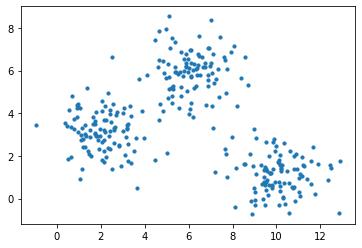

In [2]:
# load the data with pandas
dataset = pd.read_csv('dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

## Criar um novo dataset para práticar

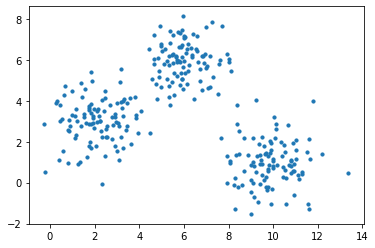

In [3]:
# Selecionar três centróides
cluster_center_1 = np.array([2,3])
cluster_center_2 = np.array([6,6])
cluster_center_3 = np.array([10,1])

# Gerar amostras aleátorias a partir dos centróides escolhidos
cluster_data_1 = np.random.randn(100, 2) + cluster_center_1
cluster_data_2 = np.random.randn(100,2) + cluster_center_2
cluster_data_3 = np.random.randn(100,2) + cluster_center_3

new_dataset = np.concatenate((cluster_data_1, cluster_data_2, 
                         cluster_data_3), axis = 0)

plt.scatter(new_dataset[:,0], new_dataset[:,1], s=10)
plt.show()

# 1. Implementar o algoritmo K-means

Nesta etapa você irá implementar as funções que compõe o algoritmo do KMeans uma a uma. É importante entender e ler a documentação de cada função, principalmente as dimensões dos dados esperados na saída.

## 1.1 Inicializar os centróides

A primeira etapa do algoritmo consiste em inicializar os centróides de maneira aleatória. Essa etapa é uma das mais importantes do algoritmo e uma boa inicialização pode diminuir bastante o tempo de convergência.

Para inicializar os centróides você pode considerar o conhecimento prévio sobre os dados, mesmo sem saber a quantidade de grupos ou sua distribuição. 

> Dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html 

In [4]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centróides calculados - [k,n]
    """
    
    #### CODE HERE ####
    
    minimum = np.min(dataset, axis=0)
    maximum = np.max(dataset, axis=0)
    shape = [k, dataset.shape[1]]
    centroids = np.random.uniform(minimum, maximum, size=shape)
    
    ### END OF CODE ###
    
    return centroids

Teste a função criada e visualize os centróides que foram calculados.

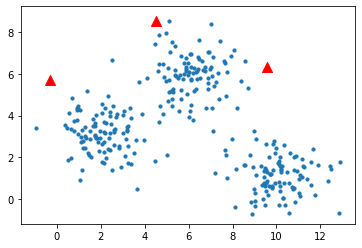

In [5]:
k = 3
centroids = calculate_initial_centers(dataset, k)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red',s=100)
plt.show()

## 1.2 Definir os clusters

Na segunda etapa do algoritmo serão definidos o grupo de cada dado, de acordo com os centróides calculados.

### 1.2.1 Função de distância 

Codifique a função de distância euclidiana entre dois pontos __(a, b)__.

Definido pela equação:

$$ dist(a, b) = \sqrt{(a_1-b_1)^{2}+(a_2-b_2)^{2}+ ... + (a_n-b_n)^{2}} $$

$$ dist(a, b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^{2}} $$

In [6]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]
    
    Retornos:
    distance -- Distância euclidiana entre os pontos
    """
    
    #### CODE HERE ####
    
    distance = np.sqrt(np.sum(np.square(a-b)))
    
    ### END OF CODE ###
    
    return distance

Teste a função criada.

In [7]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (euclidean_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


### 1.2.2 Calcular o centróide mais próximo

Utilizando a função de distância codificada anteriormente, complete a função abaixo para calcular o centróide mais próximo de um ponto qualquer. 

> Dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

In [8]:
def nearest_centroid(a, centroids):
    """
    Calcula o índice do centroid mais próximo ao ponto a
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_index -- Índice do centróide mais próximo
    """
    
    #### CODE HERE ####
    
    distance_zeros = np.zeros(centroids.shape[0])
    for index, centroid in enumerate(centroids):
        distance = euclidean_distance(a, centroid)
        distance_zeros[index] = distance
    
    nearest_index = np.argmin(distance_zeros)
      
    ### END OF CODE ###
    
    return nearest_index

Teste a função criada

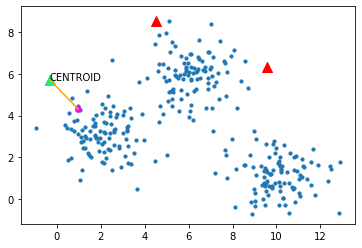

In [9]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index,:]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], s=10)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c='magenta', s=30)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],
            marker='^', c='springgreen', s=100)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot([a[0], centroids[idx_nearest_centroid,0]], 
         [a[1], centroids[idx_nearest_centroid,1]],c='orange')
plt.annotate('CENTROID', (centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],))
plt.show()

### 1.2.3 Calcular centróide mais próximo de cada dado do dataset

Utilizando a função anterior que retorna o índice do centroid mais próximo, calcule o centróide mais próximo de cada dado do dataset. 

In [10]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o índice do centroid mais próximo para cada 
    ponto do dataset
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    """
    
    #### CODE HERE ####
    
    nearest_indexes = np.zeros(dataset.shape[0])
    
    for index, a in enumerate(dataset):
        nearest_indexes[index] = nearest_centroid(a, centroids)
      
    ### END OF CODE ###
    
    return nearest_indexes

Teste a função criada visualizando os cluster formados.

In [11]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

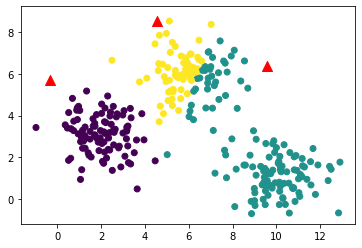

In [12]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

## 1.3 Métrica de avaliação 

Após formar os clusters, como sabemos se o resultado gerado é bom? Para isso, precisamos definir uma métrica de avaliação.

O algoritmo K-means tem como objetivo escolher centróides que minimizem a soma quadrática das distância entre os dados de um cluster e seu centróide. Essa métrica é conhecida como __inertia__.

$$\sum_{i=0}^{n}\min_{c_j \in C}(||x_i - c_j||^2)$$

A __inertia__, ou o critério de soma dos quadrados dentro do cluster, pode ser reconhecido como uma medida de o quão internamente coerentes são os clusters, porém ela sofre de alguns inconvenientes:

- A inertia pressupõe que os clusters são convexos e isotrópicos, o que nem sempre é o caso. Desta forma, pode não representar bem em aglomerados alongados ou variedades com formas irregulares.
- A inertia não é uma métrica normalizada: sabemos apenas que valores mais baixos são melhores e zero é o valor ótimo. Mas em espaços de dimensões muito altas, as distâncias euclidianas tendem a se tornar infladas (este é um exemplo da chamada “maldição da dimensionalidade”). A execução de um algoritmo de redução de dimensionalidade, como o PCA, pode aliviar esse problema e acelerar os cálculos.

Fonte: https://scikit-learn.org/stable/modules/clustering.html

Para podermos avaliar os nosso clusters, codifique a métrica da inertia abaixo, para isso você pode utilizar a função de distância euclidiana construída anteriormente.

$$inertia = \sum_{i=0}^{n}\min_{c_j \in C} (dist(x_i, c_j))^2$$

In [13]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o 
    centro do cluster mais próximo.
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    inertia -- Soma total do quadrado da distância entre 
    os dados de um cluster e seu centróide
    """
    
    #### CODE HERE ####
    
    inertia = 0
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:]
        for a in dataframe:
            inertia += np.square(euclidean_distance(a,centroid))
      
    ### END OF CODE ###
    
    return inertia

Teste a função codificada executando o código abaixo.

In [14]:
tmp_data = np.array([[1,2,3],[3,6,5],[4,5,6]])
tmp_centroide = np.array([[2,3,4]])

tmp_nearest_indexes = all_nearest_centroids(tmp_data, tmp_centroide)
if inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")

Inertia calculada corretamente!


In [15]:
# Use a função para verificar a inertia dos seus clusters
inertia(dataset, centroids, nearest_indexes)

5216.8476543788065

## 1.4 Atualizar os clusters

Nessa etapa, os centróides são recomputados. O novo valor de cada centróide será a media de todos os dados atribuídos ao cluster.

In [16]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    centroids -- Lista com centróides atualizados - [k,n]
    """
    
    #### CODE HERE ####
    
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:]
        if(dataframe.size != 0):
            centroids[index] = np.mean(dataframe, axis=0)
    
    ### END OF CODE ###
    
    return centroids

Visualize os clusters formados

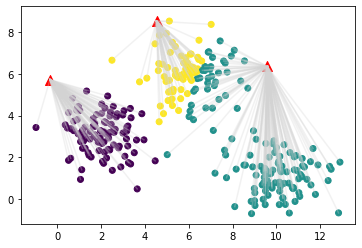

In [17]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()

Execute a função de atualização e visualize novamente os cluster formados

In [18]:
centroids = update_centroids(dataset, centroids, nearest_indexes)

# 2. K-means

## 2.1 Algoritmo completo

Utilizando as funções codificadas anteriormente, complete a classe do algoritmo K-means!

In [19]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self,X):
        
        # Inicializa os centróides
        self.cluster_centers_ = calculate_initial_centers(X, self.n_clusters)
        
        # Computa o cluster de cada amostra
        self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
        
        # Calcula a inércia inicial
        old_inertia = inertia(X, self.cluster_centers_, self.labels_)
        
        for index in range(self.max_iter):
            
            #### CODE HERE ####
            
            self.cluster_centers_ = update_centroids(X, self.cluster_centers_, self.labels_)
            self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)
            
            if(old_inertia == self.inertia_):
                break
            else:
                old_inertia = self.inertia_
      
            ### END OF CODE ###
                    
        return self
    
    def predict(self, X):
        
        return all_nearest_centroids(X, self.cluster_centers_)

Verifique o resultado do algoritmo abaixo!

Inércia =  608.6035508327786


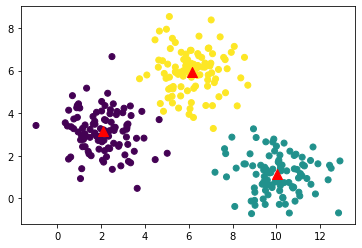

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

## 2.2 Comparar com algoritmo do Scikit-Learn

Use a implementação do algoritmo do scikit-learn do K-means para o mesmo conjunto de dados. Mostre o valor da inércia  e os conjuntos gerados pelo modelo. Você pode usar a mesma estrutura da célula de código anterior.
> Dica: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans

Inércia =  608.6035508327782


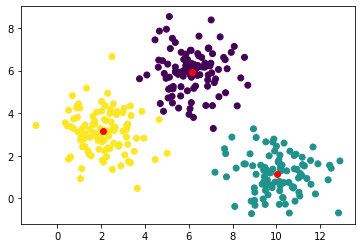

In [21]:
from sklearn.cluster import KMeans as scikit_KMeans

scikit_kmeans = scikit_KMeans(n_clusters=3)
scikit_kmeans.fit(dataset)

print("Inércia = ", scikit_kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=scikit_kmeans.labels_)
plt.scatter(scikit_kmeans.cluster_centers_[:,0], 
            scikit_kmeans.cluster_centers_[:,1], c='red')

plt.show()

# 3. Método do cotovelo

Implemete o método do cotovelo e mostre o melhor K para o conjunto de dados.

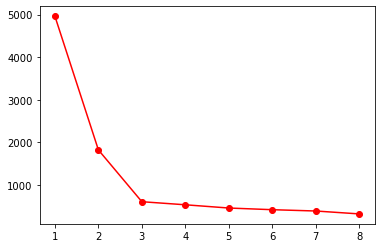

In [22]:
n_clusters_test = 8

n_sequence = np.arange(1, n_clusters_test+1)
inertia_vec = np.zeros(n_clusters_test)

for index, n_cluster in enumerate(n_sequence):
    inertia_vec[index] = KMeans(n_clusters=n_cluster).fit(dataset).inertia_
    
plt.plot(n_sequence, inertia_vec, 'ro-')
plt.show()